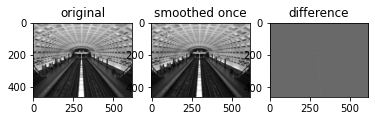

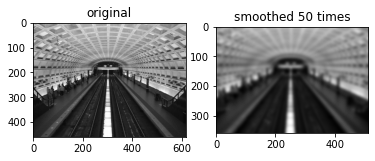

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def smooth(img):
    avg_img =(    img[1:-1 ,1:-1]  # center
                + img[ :-2 ,1:-1]  # top
                + img[2:   ,1:-1]  # bottom
                + img[1:-1 , :-2]  # left
                + img[1:-1 ,2:  ]  # right
                ) / 5.0
    return avg_img


def smooth_loop(img):
    smoothed = np.zeros((img.shape[0]-2, img.shape[1]-2))
    for r in range(0, img.shape[0]-2):
        for c in range(0, img.shape[1]-2):
            smoothed[r, c] = (  img[r+1, c+1]  # center
                              + img[r  , c+1]  # top
                              + img[r+2, c+1]  # bottom
                              + img[r+1, c  ]  # left
                              + img[r+1, c+2]  # right
                             ) / 5.0
    return smoothed


img = plt.imread('dc_metro.png')
avg_img = smooth(img)

plt.figure()
# Set colormap so that images are plotted in gray scale.
plt.gray()
# Plot the original image first
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('original')

# Now the filtered image.
plt.subplot(1,3,2)
plt.imshow(avg_img)
plt.title('smoothed once')

# And finally the difference between the two.
plt.subplot(1,3,3)
plt.imshow(img[1:-1,1:-1] - avg_img)
plt.title('difference')


# Bonus: Re-filter the image by passing the result image
#        through the filter again.  Do this 50 times and plot
#        the resulting image.

for num in range(50):
    avg_img = smooth(avg_img)

# Plot the original image first
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('original')

# Now the filtered image.
plt.subplot(1,2,2)
plt.imshow(avg_img)
plt.title('smoothed 50 times')

assert np.allclose(smooth(img), smooth_loop(img))

plt.show()